### Sensory Node Behavior
_This example illustrates the behavior or sensory neurons, and the importance of the concentration-sensory firing probability relationship._


In [4]:
import settings
from simulate import new_sim
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)
import matplotlib.pyplot as plt
import pyBrainNetSim.drawing.viewers as vw
import pyBrainNetSim.generators.special_functions as sfunct
from scipy import stats
import numpy as np
from pyBrainNetSim import utils

#### Setup and Perform Simulation
Here we are changing the:
- Defining the physical grid and the number of iterations in time to run the simulation
- Location & strength (e.g. strength of odor) of the "food"
- Sensory concentration-firing probability curve,

In [13]:
settings.NODE_PROPS['Sensory']['sensory_mid'] = 10**-1
settings.NODE_PROPS['Sensory']['stimuli_sensitivity'] = 6*10**-1
settings.ATTRACTOR['strength'] = 1.
settings.ATTRACTOR['position'] = [5,5]
settings.ENVIRONMENT['permeability'] = 0.1
settings.ENVIRONMENT['origin'] = (0, 0)
settings.ENVIRONMENT['maximum_point'] = (10, 10)
settings.ITERATIONS = 20
smp = new_sim()  # runs the simulation
i0 = smp.individuals['G0_I0']  # Identification of the first individual
i0_nn = i0.internal.simdata # Neural Network data for all time
i0_nn0 = i0_nn[-1]  # Neural Network at the latest time step

#### Draw the simulation

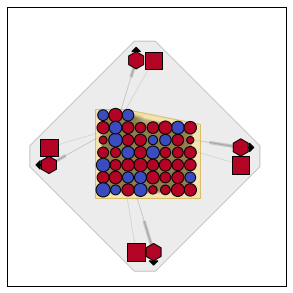

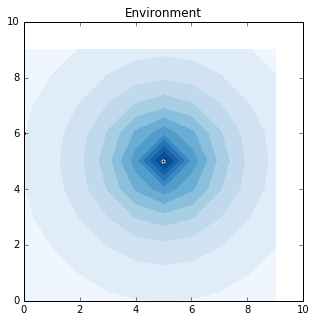

In [14]:
_ = vw.draw_networkx(i0.internal.simdata[1])  # draw the internal neural network
_ = i0.environment.plot_individual_trajectory()  # draw the trajectory within the environment

#### Draw Sensory Neurons
##### Stimuli, Sensory Curve, Firing Probability, and Firing

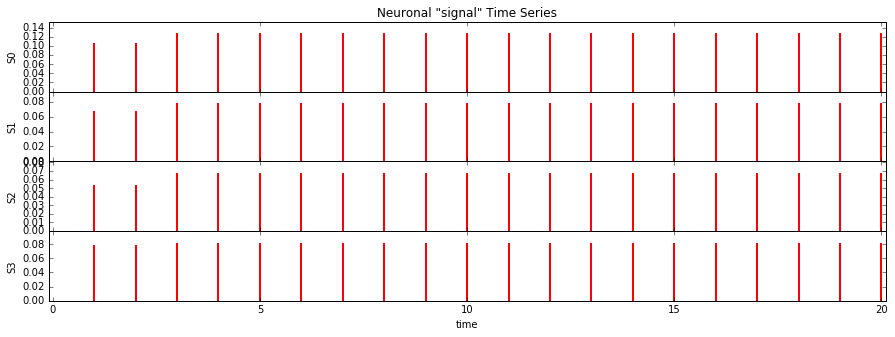

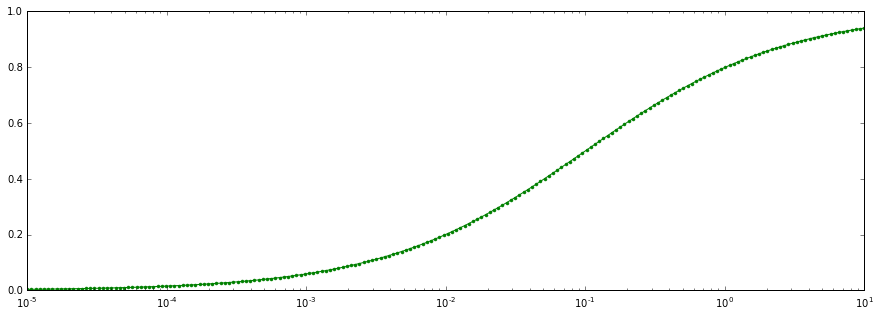

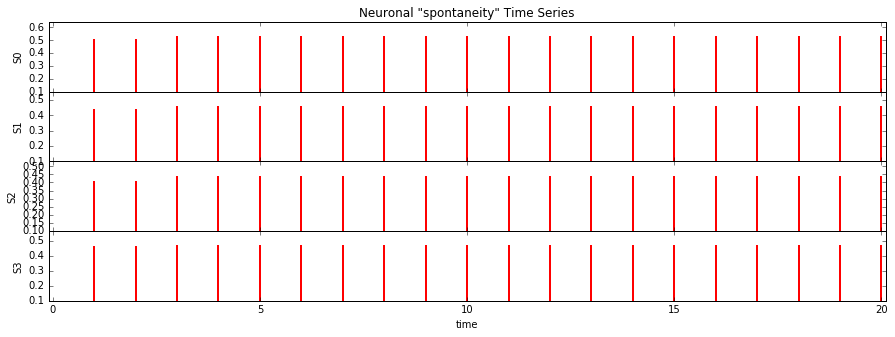

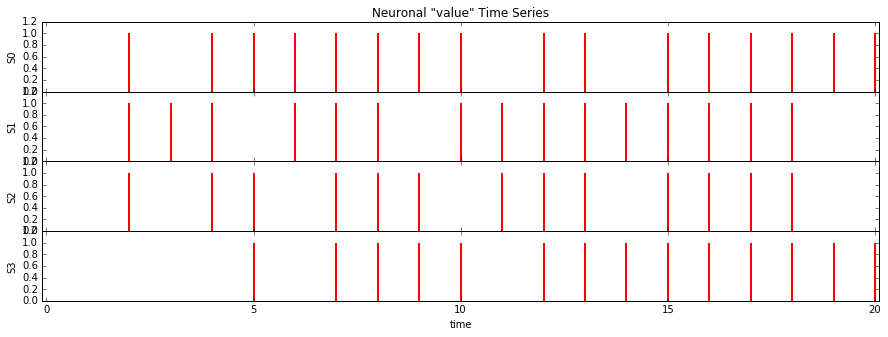

In [15]:
nid = ['S0', 'S1', 'S2', 'S3']  # Id's of the sensory neurons
ax1 = vw.plot_node_property_ts(i0_nn, prop='signal', neuron_ids=nid)
s = vw.plot_sensory_node_sensitivity(i0_nn0.node[nid[0]])
ax1 = vw.plot_node_property_ts(i0_nn, prop='spontaneity', neuron_ids=nid)
ax1 = vw.plot_node_property_ts(i0_nn, prop='value', neuron_ids=nid)